<a href="https://colab.research.google.com/github/santra-subhojit/Ybi_MLprojects/blob/main/HandWrittenDigit_PredictionIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand Written Digit Prediction-Classification Analysis
#The digits dataset consists of 8x8 pixel images pf digits.The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.we will use these arrays to visualize the first 4 images.The target attritube of the dataset stores the digit each image represents.

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

#Load and Describe Data

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(f"Dataset shape: {digits.images.shape}")
print(f"Target labels shape: {digits.target.shape}")

Dataset shape: (1797, 8, 8)
Target labels shape: (1797,)


#Data Visualization - Display First 4 Images

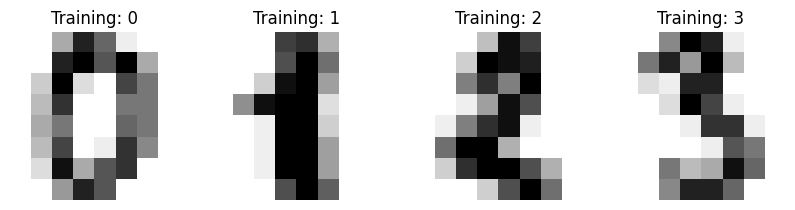

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Training: {label}')
plt.show()

#Data Preprocessing - Flatten Images

In [6]:
digits.images.shape
digits.images[0]
digits.images[0].shape
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(f"Data shape after flattening: {data.shape}")

Data shape after flattening: (1797, 64)


#Scaling Data to 0-1 Range

In [7]:
data.min()
data.max()
data = data / 16.0  # Normalizing pixel values to range [0, 1]
print(f"Data min: {data.min()}, max: {data.max()}")

Data min: 0.0, max: 1.0


#Train-Test Split


In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, digits.target, test_size=0.3, random_state=42)
print(f"xtrain shape: {xtrain.shape}, xtest shape: {xtest.shape}")
print(f"ytrain shape: {ytrain.shape}, ytest shape: {ytest.shape}")

xtrain shape: (1257, 64), xtest shape: (540, 64)
ytrain shape: (1257,), ytest shape: (540,)


# Modeling - Train Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

#Prediction on Test Data

In [11]:
y_pred = rf.predict(xtest)
y_pred

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [12]:
y_pred = rf.predict(xtest)
print(f"Predictions: {y_pred[:10]}")

Predictions: [6 9 3 7 2 1 5 2 5 2]


#Model Evaluation
# Confusion Matrix


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytest, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 63,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 56]])

In [14]:
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


In [16]:
print(classification_report(ytest, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



#Visualization of the Confusion Matrix

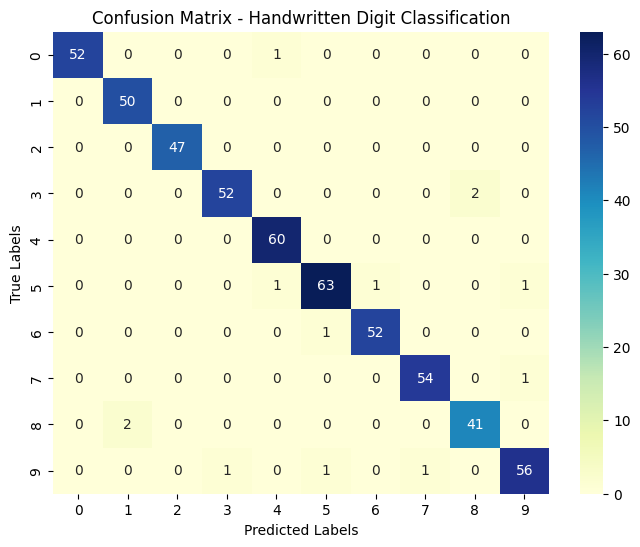

In [17]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Handwritten Digit Classification")
plt.show()

#Explaination
#Handwritten Digit Prediction, or Digit Classification, is like training a computer to read and understand handwritten numbers, similar to how we recognize them ourselves. Imagine you have a bunch of pictures, each showing a handwritten digit from 0 to 9. The goal is to teach the computer how to look at these pictures and figure out which digit is in each one. We split our pictures into two groups: one set to teach the computer (training set) and another to test its skills (testing set). We choose a smart method, like a special problem-solving recipe, for the computer to learn the patterns and differences in the pictures. As it learns, we guide it by telling whether its guesses are right or wrong. Once it masters this skill, we give it new pictures it hasn't seen during training, and it tries its best to guess the correct digit. We check its guesses to see how well it's doing, using simple checks to see if it's getting the numbers correct. This project helps us build a computer that can recognize handwritten digits, which has practical uses like reading postal codes or helping computers understand our handwriting. It's like teaching the computer to read your handwriting.